# Image Dataset Processing Code

### THIS IS THE MAIN PROGRAM/CODE CELL FOR EVALUATING AND TESTING IMAGE CLASSIFIER
- User has to provide input as gray scale images for training in numpy file format
- User can also test the image classifier on test gray scale images, provided in numpy file format
- (Optional) User can choose classifier type between 'RandomForest' or 'KNearestNeighbour'

Original data shape: (60000, 1, 28, 28)
Reshaped data shape: (60000, 784)


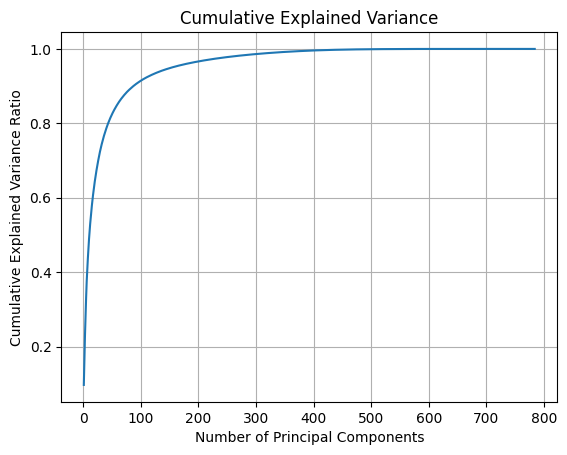

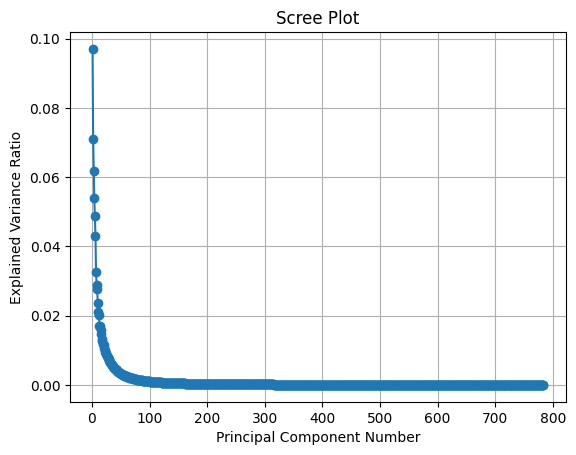

Number of features/components to retain 95.0% variance: 154
PCA Reduced data shape: (60000, 154)


array([7, 4, 0, ..., 6, 4, 8], dtype=int32)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


3162
8930
5583
5967
3088
8847
5715
4687
7460
6561


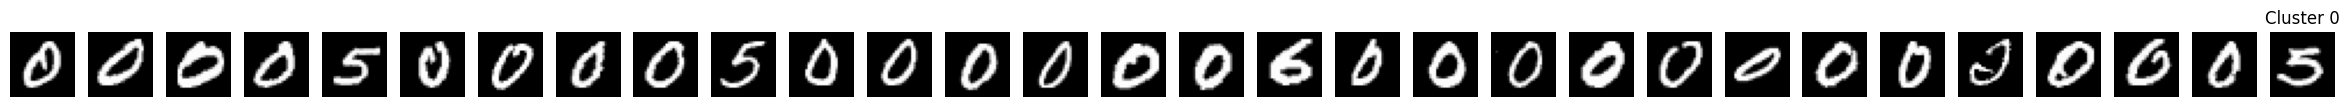

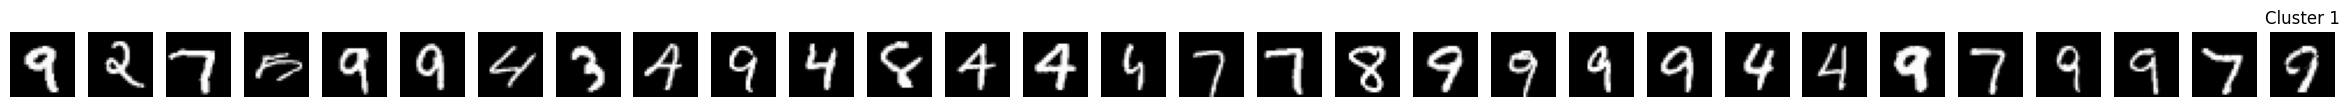

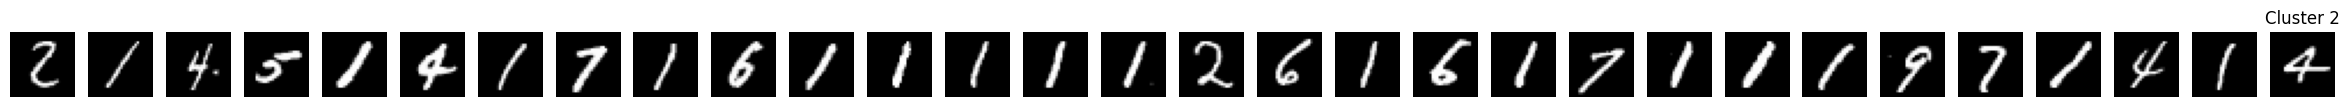

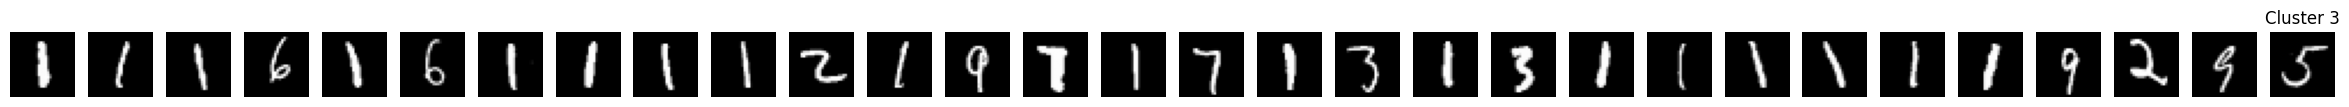

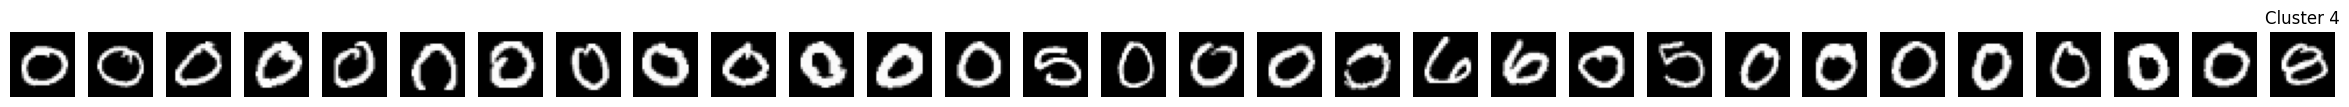

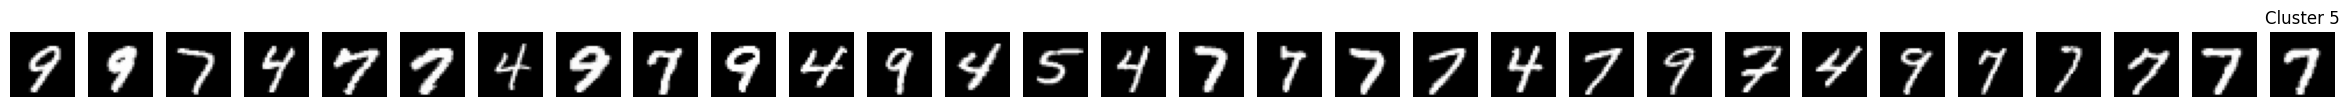

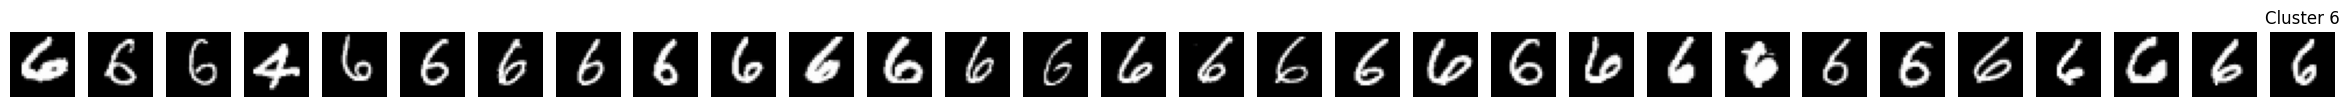

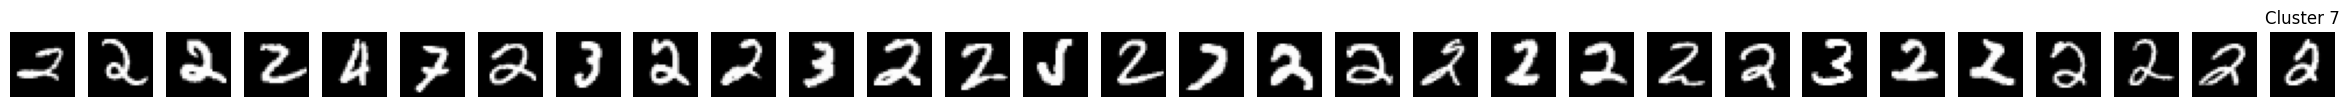

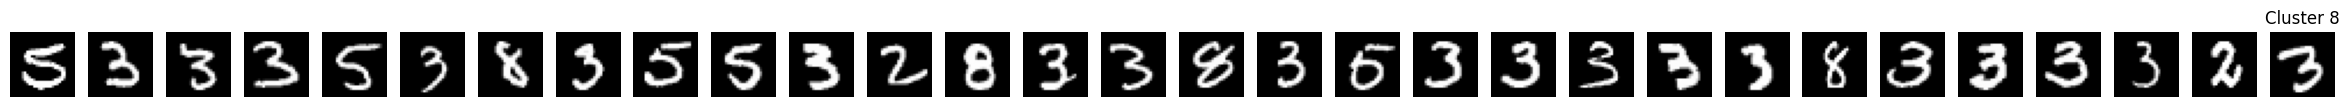

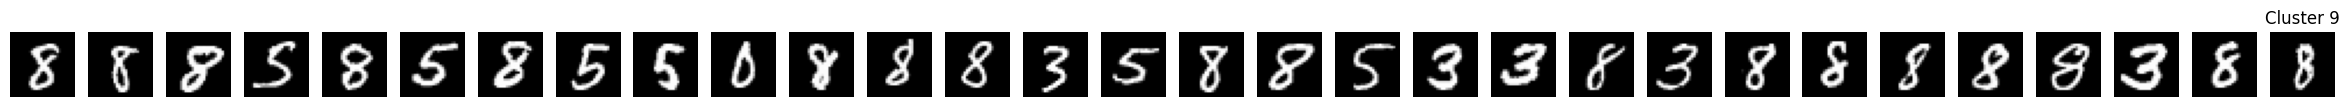

Training RandomForest classifier on reshaped full training set...
(RandomForest) Image Classifier - Train accuracy: 1.0000, Validation accuracy: 0.9232, Confidence: [0.79 0.98 0.97 ... 0.76 0.99 0.96]


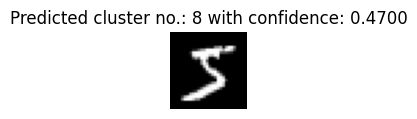

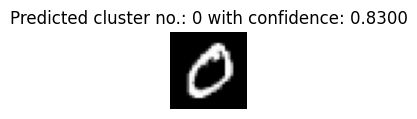

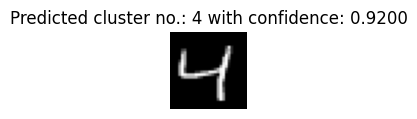

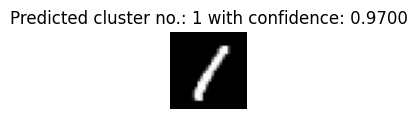

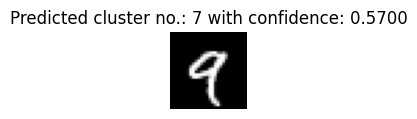

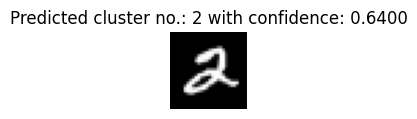

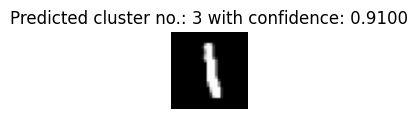

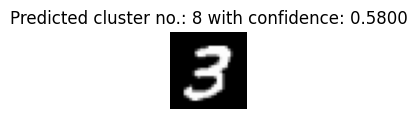

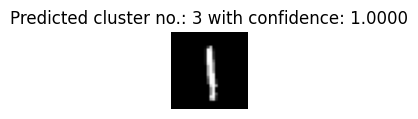

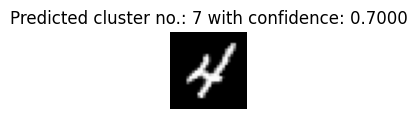

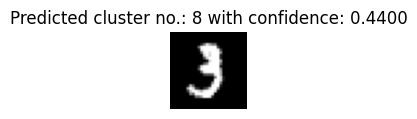

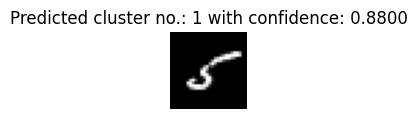

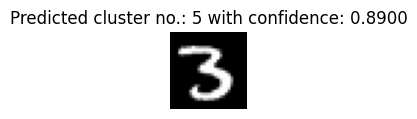

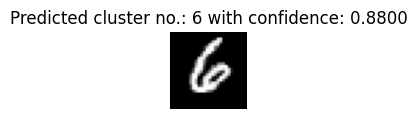

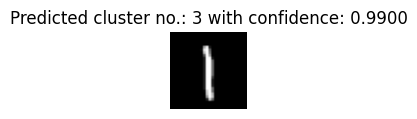

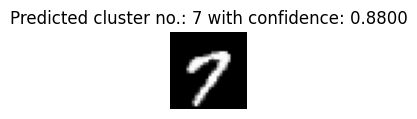

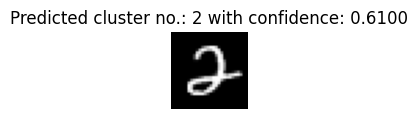

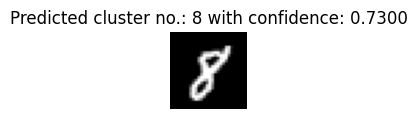

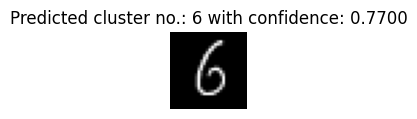

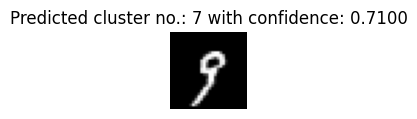

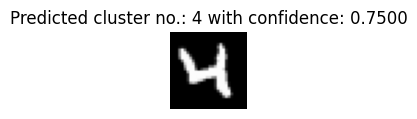

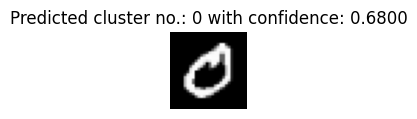

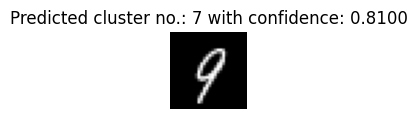

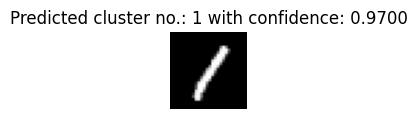

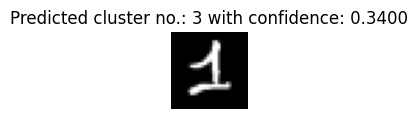

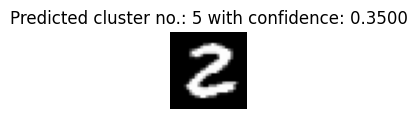

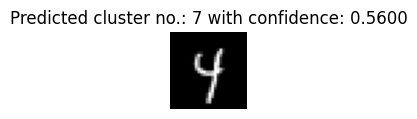

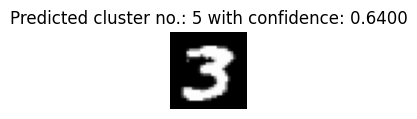

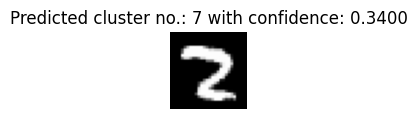

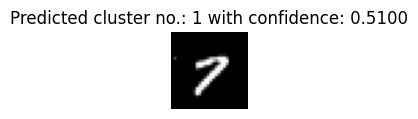

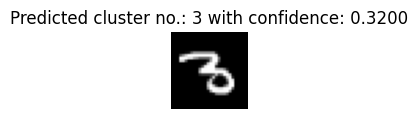

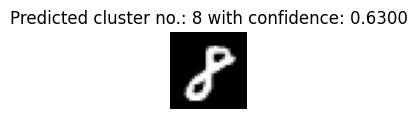

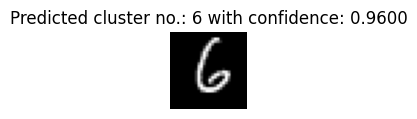

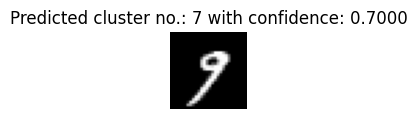

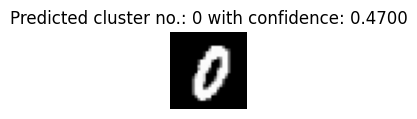

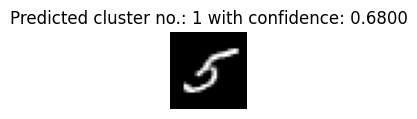

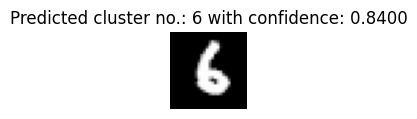

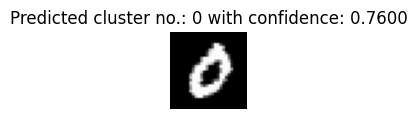

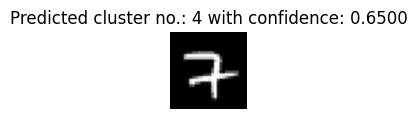

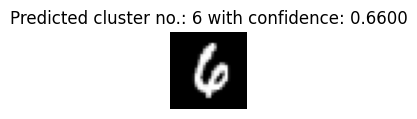

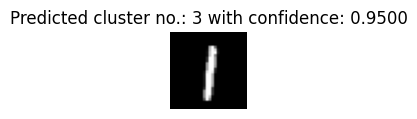

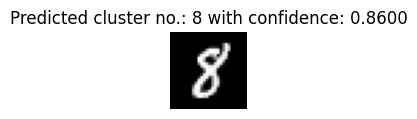

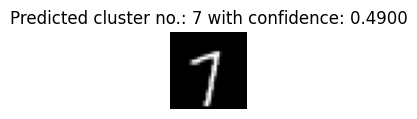

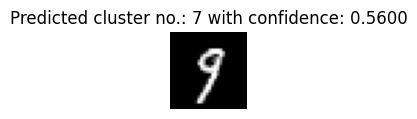

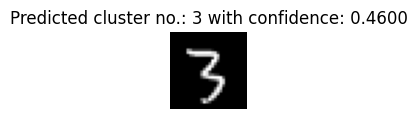

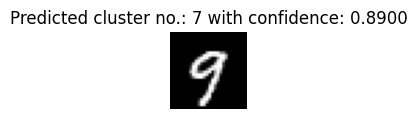

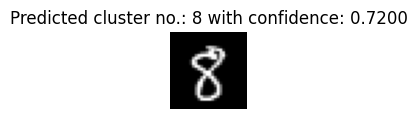

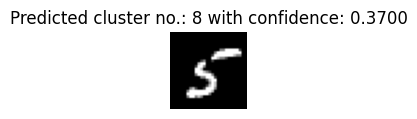

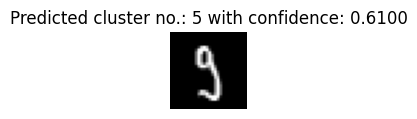

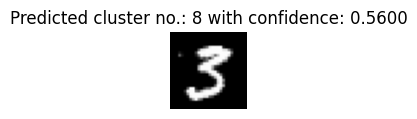

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import umap.umap_ as umap
import hdbscan

# Main function to put everything together
def create_labels_for_unlabeled_dataset(X_train, clusteringType):

  #X_train = np.load('../../Datasets/unlabelled_train_data_images.npy')

  #STEP 1 - Preprocess images
  # the data shape is
  # this is a dataset of 60000 (60k) images each of size 28 pixels
  # by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
  print(f"Original data shape: {X_train.shape}")

  # trying to reshape
  reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
  print(f"Reshaped data shape: {reshaped_X_train.shape}")


  # STEP 2: CREATE EMBEDDINGS / ENCODING
  # Initialize PCA
  pca = PCA()
  pca.fit(reshaped_X_train)

  # Get the explained variance ratio
  explained_variance_ratio = pca.explained_variance_ratio_

  # Plot the cumulative explained variance ratio
  cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
  plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
  plt.xlabel('Number of Principal Components')
  plt.ylabel('Cumulative Explained Variance Ratio')
  plt.title('Cumulative Explained Variance')
  plt.grid(True)
  plt.show()

  plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
  plt.xlabel('Principal Component Number')
  plt.ylabel('Explained Variance Ratio')
  plt.title('Scree Plot')
  plt.grid(True)
  plt.show()

  # STEP 3: FIND OPTIMAL NUMBER OF CLUSTERS
  # Choose the number of components to retain a certain percentage of variance
  variance_coverage = 0.95
  n_components = np.argmax(cumulative_variance_ratio >= variance_coverage) + 1 # For 95% variance
  print(f"Number of features/components to retain {variance_coverage*100.0}% variance: {n_components}")

  # Re-initialize PCA with the optimal number of components
  pca_reduced = PCA(n_components=n_components)
  X_reduced = pca_reduced.fit_transform(reshaped_X_train)

  print(f"PCA Reduced data shape: {X_reduced.shape}")



  # Sujit - IF Condition for clusteringType=KMEANS OR HDBSCAN
  # STEP 4: APPLY CLUSTERING AND EXTRACT LABELS
  k = 10  # For MNIST-like image data



  if clusteringType == 'KMEANS':
    model = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm='elkan')
    labels = model.fit_predict(X_reduced)

  elif clusteringType == 'HDBSCAN':
    umap_embed = umap.UMAP(n_components=2, random_state=42).fit_transform(X_reduced)
    model = hdbscan.HDBSCAN(min_cluster_size=30)
    labels = model.fit_predict(umap_embed)
    # clusters 4and 5 contain similar values of digit 7 so merging them
    labels[labels == 5] = 4
    labels[labels == 10] = 5

  display(labels)

  mapped_labels = {
     "KMEANS": {
        0: 0,
        1: 4,
        2: 1,
        3: 3,
        4: 9,
        5: 7,
        6: 6,
        7: 2,
        8: 5,
        9: 8
     },
     "HDBSCAN": {
        0: 2,
        1: 1,
        2: 0,
        3: 6,
        4: 7,
        5: 9,
        6: 8,
        7: 5,
        8: 3,
        9: 4,
        -1: -1
     }
    }

  target_class = mapped_labels[clusteringType]

  df = pd.DataFrame(reshaped_X_train)
  df['Target'] = [target_class[label] for label in labels]

  if clusteringType == 'HDBSCAN':
    # Remove noise points (-1)
    df = df[df['Target'] != -1]

  display(df)





  #print(np.unique(labels))

# Visualize first 30 images in cluster
  for i in np.unique(labels):
        cluster_indices = np.where(labels == i)[0]
        print(len(cluster_indices))
        plt.figure(figsize=(30, 2))
        for j in range(30):
            img = X_train[cluster_indices[j]].reshape(28, 28)
            plt.subplot(1, 30, j + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
        plt.title(f"Cluster {i}")
  plt.show()

  # Calculate silhouette score to evaluate clustering quality
  # silhouette_avg = silhouette_score(X_reduced, labels)
  # print(f"Silhouette Score: {silhouette_avg:.4f} for K {k} and Variance Coverage {variance_coverage*100.0}%")

  # # STEP 5: GATHER CLUSTERING DATA BY PCA Component
  # # Create a DataFrame to store the clustering data
  # clustering_data = pd.DataFrame({'PCA_Component_' + str(i+1): X_reduced[:, i] for i in range(k)})
  # clustering_data['Cluster'] = labels


  # # STEP 7 (Optional) : VISUALIZE 20 IMAGES FROM EACH CLUSTER SO TO CHECK HOW K-MEANS CLUSTERING HAS PERFORMED
  # for i in range(0,n_cluster_to_print_image):

  #     row = np.where(labels==i)[0]  # row in labels for elements of cluster i
  #     num = row.shape[0]            # number of elements for each cluster
  #     r = int(np.floor(num/10.))    # number of rows in the figure of the cluster

  # Return the labels, embeddings (X_reduced in this case), kmeans model, and pca model
  return df['Target'].to_numpy(), X_reduced, model, pca_reduced, df.drop(columns=['Target']).to_numpy()

# Training the classifier
def train_image_classifier(features, labels, classifierName):
    """
    Train a classifier on image features and cluster-assigned labels
    """
    # Split into train and validation
    indices = np.random.permutation(len(features))
    split = int(0.8 * len(features))
    train_idx, val_idx = indices[:split], indices[split:]

    X_train, X_val = features[train_idx], features[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Train a random forest classifier
    if classifierName == 'RandomForest':
      clf = RandomForestClassifier(n_estimators=100, random_state=42)
      clf.fit(X_train, y_train)
    elif classifierType == 'KNearestNeighbour':
      clf = KNeighborsClassifier()
      clf.fit(X_train, y_train)

    # Evaluate
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    val_acc = accuracy_score(y_val, clf.predict(X_val))
    probabilities = clf.predict_proba(features)
    confidence = np.max(probabilities, axis=1)

    print(f"({classifierName}) Image Classifier - Train accuracy: {train_acc:.4f}, Validation accuracy: {val_acc:.4f}, Confidence: {confidence}")

    return clf

# Test the trained classifier
def test_image_classifier(trained_classifier, new_image_features):
    """
    Args:
        trained_classifier: The trained classifier object (e.g., RandomForestClassifier).
        new_image_features (np.ndarray): Extracted features for the new images.

    Returns:
        np.ndarray: Predicted labels for the new images.
        np.ndarray: Probabilities of each class for the new images.
        np.ndarray: Confidence scores (maximum probability) for the new predictions.
    """
    predictions = trained_classifier.predict(new_image_features)
    probabilities = trained_classifier.predict_proba(new_image_features)
    confidence = np.max(probabilities, axis=1)

    num_test_samples = new_image_features.shape[0]
    num_test_samples = 50
    for i in range(num_test_samples):
            # Reshape the image to (28, 28) before displaying
            image = new_image_features[i].reshape(28, 28)
            plt.figure(figsize=(1, 1))
            plt.imshow(image, cmap='gray')
            plt.title(f"Predicted cluster no.: {predictions[i]} with " +
                      f"confidence: {confidence[i]:.4f}")
            plt.axis('off')
            plt.show()

    return predictions, probabilities, confidence

#MAIN PROGRAM FOR IMAGE CLASSIFICATION STARTS FROM HERE
# Example usage of the program
# INPUT TARIN GRAY SCALE IMAGES DATA IN NUMPY FORMAT
X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')
clusteringType='KMEANS'
Y_train, embeddings, kmeans_model, pca_model, reshaped_X_train = create_labels_for_unlabeled_dataset(X_train, clusteringType)

# Training the classifier
classifierType='RandomForest'
print(f"Training {classifierType} classifier on reshaped full training set...")
image_classifier  = train_image_classifier(reshaped_X_train, Y_train, classifierType)

# TEST GRAY SCALE IMAGE FILE(S) IN NUMPY FORMAT (SAME AS INPUT TRAIN GRAY SCALE IMAGES)
X_test_data = np.load('/content/sample_data/testingimages.npy')

#STEP 1 - Preprocess testing images
# the data shape is
# this is a dataset of 60000 (60k) images each of size 28 pixels
# by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
#print(f"Original data shape: {X_test_data.shape}")

# reshape the testing image data
reshaped_X_test = X_test_data.reshape(X_test_data.shape[0], -1)
#print(f"Reshaped testing data shape: {reshaped_X_test.shape}")
predictions, probabilities, test_confidence = test_image_classifier(image_classifier, reshaped_X_test)
#print(f"(RandomForest) Image Classifier - Test predictions: {predictions}, Test probabilities: {probabilities}, Test Confidence: {test_confidence}")

# Text Dataset Processing Code

### THIS IS THE MAIN PROGRAM/CODE CELL FOR EVALUATING AND TESTING TEXT CLASSIFIER
- User has to provide input as text file format
- User can also test the text classifier on unseen text data provided in txt file format
- (Optional) User can choose classifier type between 'RandomForest' or 'LogisticRegression'

In [6]:
from os import write
#!pip install numpy
#!pip install gensim
#!pip install umap-learn
#!pip install hdbscan
#!pip install tqdm
#!pip install --upgrade scipy

import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import numpy as np
from tqdm import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def create_text_embeddings(texts, model_path=None, vector_size=100):
    """
    Create sentence embeddings using Word2Vec (average of word vectors).
    """
    # Tokenize texts
    tokenized_texts = [word_tokenize(text.lower()) for text in texts]

    # Train or load Word2Vec model
    if model_path:
        model = Word2Vec.load(model_path)
    else:
        model = Word2Vec(sentences=tokenized_texts, vector_size=vector_size, window=5, min_count=1, workers=4)

    embeddings = []
    for tokens in tqdm(tokenized_texts):
        valid_tokens = [token for token in tokens if token in model.wv]
        if valid_tokens:
            sentence_embedding = np.mean([model.wv[token] for token in valid_tokens], axis=0)
        else:
            sentence_embedding = np.zeros(vector_size)
        embeddings.append(sentence_embedding)

    return np.array(embeddings)

def cluster_texts(features, n_clusters, clusteringType):
    """
    Cluster text features
    """
    # Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Apply clustering algorithm
    if clusteringType == 'KMEANS':
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(scaled_features)
        centers = clusterer.cluster_centers_

    # Summarize results
    print(f"{clusteringType} Clustering completed on training texts")
    cluster_counts = np.bincount(cluster_labels.astype(int))
    for cluster_id, count in enumerate(cluster_counts):
        print(f"Cluster {cluster_id}: {count} texts")

    # Evaluate clustering with silhouette score
    if len(np.unique(cluster_labels)) > 1:
        silhouette = silhouette_score(scaled_features, cluster_labels)
        print(f"Silhouette Score: {silhouette:.4f}")

    print("cluster_labels:",cluster_labels)

    # Writing each cluster and 100 texts classified to that cluster in a separate text file
    #write_clusters_to_file(cluster_labels, X_train_text, clusteringType)

    return cluster_labels, clusterer, scaled_features, centers

def write_clusters_to_file(cluster_labels, texts, clusteringType, output_file="/content/sample_data/cluster_results.txt"):
    """
    Write cluster information and sample texts to a single output file
    """
    print(f"{clusteringType} Clustering completed on training texts")
    cluster_counts = np.bincount(cluster_labels.astype(int))

    # Open file for writing all cluster information
    with open(output_file, 'w', encoding='utf-8') as f:
        # Write summary of all clusters first
        for cluster_id, count in enumerate(cluster_counts):
            f.write(f"Cluster {cluster_id}: {count} texts\n")
            print(f"Cluster {cluster_id}: {count} texts")

        f.write("\n--- SAMPLE TEXTS PER CLUSTER ---\n\n")

        # For each cluster, write up to 100 sample texts
        for cluster_id in range(len(cluster_counts)):
            # Create a header for this cluster section
            f.write(f"\n=== CLUSTER {cluster_id} SAMPLE TEXTS ===\n\n")

            # Get indices of texts belonging to this cluster
            cluster_indices = np.where(cluster_labels == cluster_id)[0]

            # Select up to 100 texts from this cluster
            sample_size = min(200, len(cluster_indices))
            sample_indices = cluster_indices[:sample_size]

            # Write each sample text
            for i, idx in enumerate(sample_indices):
                display_text = texts[idx][:100] + "..." if len(texts[idx]) > 100 else texts[idx]
                f.write(f"{i+1}. {display_text}\n\n")

    print(f"Cluster information written to {output_file}")

def visualize_text_clusters(features, labels, centers=None):
    """
    Visualize text clusters using PCA or t-SNE
    """
    # Reduce to 2D for visualization
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    # Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', alpha=0.6)

    if centers is not None:
        # Instead of using transform, we can approximate the projection of the centers
        # by finding the average position of the points in each cluster.
        centers_2d = np.array([reduced_features[labels == i].mean(axis=0) for i in range(centers.shape[0])])
        plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=100)

    plt.colorbar(scatter, label='Cluster')
    plt.title('Text Cluster Visualization using t-SNE')
    plt.show()
    plt.close()

def train_text_classifier(features, labels, classifierType):
    """
    Train a classifier on text features and cluster-assigned labels
    """
    # Split into train and validation
    indices = np.random.permutation(len(features))
    split = int(0.8 * len(features))
    train_idx, val_idx = indices[:split], indices[split:]

    X_train, X_val = features[train_idx], features[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    if classifierType == 'RandomForest':
      # Train a random forest classifier
      clf = RandomForestClassifier(n_estimators=100, random_state=42)
      clf.fit(X_train, y_train)
    elif classifierType == 'LogisticRegression':
      # Train a logistic regression classifier
      clf = LogisticRegression(max_iter=1000)
      clf.fit(X_train, y_train)

    # Evaluate
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    val_acc = accuracy_score(y_val, clf.predict(X_val))

    print(f"{classifierType} Text Classifier - Train accuracy: {train_acc:.4f}, Validation accuracy: {val_acc:.4f}")

    return clf

def analyze_prediction_results(features, predictions, n_clusters, category_type="Text"):
    """
    Analyze and visualize predictions on new data
    """
    # 1. Visualize predictions with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    # Commenting below lines of plotting because it is taking a long time to plot
    #plt.figure(figsize=(12, 10))
    #plt.subplot(2, 1, 1)
    #scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=predictions, cmap='viridis', alpha=0.6)
    #plt.colorbar(scatter, label='Predicted Cluster')
    #plt.title(f't-SNE Visualization of {category_type} Predictions')

    # 2. Distribution of predictions
    plt.subplot(2, 1, 2)
    cluster_counts = np.bincount(predictions.astype(int), minlength=n_clusters)
    plt.bar(range(n_clusters), cluster_counts)
    plt.xlabel('Cluster ID')
    plt.ylabel('Count')
    plt.title(f'Distribution of {category_type} Predictions')
    plt.xticks(range(n_clusters))

    plt.tight_layout()
    plt.show()
    plt.close()

def predict_on_new_texts(text_file, text_classifier, scaler):
    """
    Apply trained text classifier to new unseen text data
    """
    print("Loading new unseen testing data...")
    with open(text_file, 'r', encoding='utf-8') as f:
        texts = [line.strip() for line in f if line.strip()]

    print(f"Creating embeddings for {len(texts)} testing texts...")
    text_features = create_text_embeddings(texts)

    # Scale features using the same scaler that was used for training
    scaled_features = scaler.transform(text_features)

    # Predict using the trained classifier
    predictions = text_classifier.predict(scaled_features)
    probabilities = text_classifier.predict_proba(scaled_features)

    # Calculate confidence as the max probability
    confidence = np.max(probabilities, axis=1)

    results = []
    for i, (text, pred, conf) in enumerate(zip(texts, predictions, confidence)):
        # Truncate text for display purposes
        display_text = text[:150] + "..." if len(text) > 50 else text
        results.append({
            'text': display_text,
            'predicted_cluster': int(pred),
            'confidence': float(conf)
        })

    # Summarize results
    print(f"Predictions completed for {len(results)} testing texts")
    cluster_counts = np.bincount(predictions.astype(int))
    for cluster_id, count in enumerate(cluster_counts):
        print(f"Cluster {cluster_id}: {count} texts")

    print("Results Predicted\nPlease uncomment method 'write_prediction_results' to write the prediction results in file 'prediction_results.txt'")
    # Create an array to store formatted results
    formatted_results = []

    # Collect formatted results for the first 100 items
    for i, result in enumerate(results[:100]):
        result_text = f"--- Result #{i+1} ---\n"
        result_text += f"Text: {result['text']}\n"
        result_text += f"Predicted Cluster: {result['predicted_cluster']}\n"
        result_text += f"Confidence: {result['confidence']:.4f}\n\n"
        formatted_results.append(result_text)

    # Writing the prediction results in a txt file
    #write_prediction_results(results)

    return results, scaled_features, predictions

def write_prediction_results(results, output_file="/content/sample_data/prediction_results.txt"):
    """
    Write 100 prediction results to a separate text file
    """
    #print(f"Writing first 100 prediction results to {output_file}...")

    with open(output_file, 'w', encoding='utf-8') as f:
        f.write("PREDICTION RESULTS\n\n")

        for i, result in enumerate(results[:100]):
            f.write(f"--- Result #{i+1} ---\n")
            f.write(f"Text: {result['text']}\n")
            f.write(f"Predicted Cluster: {result['predicted_cluster']}\n")
            f.write(f"Confidence: {result['confidence']:.4f}\n\n")

    #print(f"Successfully wrote prediction results to {output_file}")

#MAIN PROGRAM FOR TEXT CLASSIFICATION STARTS FROM HERE
# Import and process text
X_train = pickle.load(open('/content/sample_data/train_data_text.pkl', 'rb'))

word_counts = [len(text.split()) for text in X_train]
total_word_count = sum(word_counts)

# Print word count information
print(f"Text data contains {len(X_train)} documents with {total_word_count} total words")
print(f"Average word count per document: {total_word_count / len(X_train):.1f}")
print(f"Minimum word count: {min(word_counts)}, Maximum word count: {max(word_counts)}")

print("Training using texts...\n")
print("Creating text embeddings...")
text_features = create_text_embeddings(X_train)

print("Clustering text...")
clusteringType='KMEANS'
n_clusters=5
Y_train, text_clusterer, scaled_text_features, text_centers = cluster_texts(text_features, n_clusters, clusteringType)

#print("Visualizing text clusters...")
#visualize_text_clusters(scaled_text_features, Y_train, text_centers)

classifierType='RandomForest'
#classifierType='LogisticRegression'
print(f"Training {classifierType} text classifier...")
text_classifier = train_text_classifier(scaled_text_features, Y_train, classifierType)

# Get the scaler used for text clustering
text_scaler = StandardScaler()
text_scaler.fit(text_features)

print("Training complete!\n")

# Test on external data (uncomment and provide paths when needed)
# Test text classifier on new text
new_text_file = "/content/sample_data/Crime-Science-Politics.txt"

text_results, scaled_new_text_features, text_predictions = predict_on_new_texts(
     new_text_file, text_classifier, text_scaler
)
#analyze_prediction_results(scaled_new_text_features, text_predictions, 5, "Text")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Text data contains 1500 documents with 412622 total words
Average word count per document: 275.1
Minimum word count: 1, Maximum word count: 7940
Training using texts...

Creating text embeddings...


100%|██████████| 1500/1500 [00:01<00:00, 1370.33it/s]


Clustering text...
KMEANS Clustering completed on training texts
Cluster 0: 426 texts
Cluster 1: 291 texts
Cluster 2: 25 texts
Cluster 3: 104 texts
Cluster 4: 654 texts
Silhouette Score: 0.2264
cluster_labels: [4 4 2 ... 1 1 0]
Training RandomForest text classifier...
RandomForest Text Classifier - Train accuracy: 1.0000, Validation accuracy: 0.9600
Training complete!

Loading new unseen testing data...
Creating embeddings for 93617 testing texts...


100%|██████████| 93617/93617 [00:04<00:00, 19302.33it/s]


Predictions completed for 93617 testing texts
Cluster 0: 3248 texts
Cluster 1: 89981 texts
Cluster 2: 4 texts
Cluster 3: 2 texts
Cluster 4: 382 texts
Results Predicted
Please uncomment method 'write_prediction_results' to write the prediction results in file 'prediction_results.txt'
